<h1 style=" text-align : center;  font-family: 'JetBrains Mono'; color: purple;"><b>GROUP4- GLOBAL DATA SCIENCE SALARIES AMID 2020 - 2024 DATAVISUALIZATION </b></h1>


In [47]:
!pip install pycountry
!pip install country_converter

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.offline import iplot
from wordcloud import WordCloud

# Geocoding
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Text processing
import nltk

# Country information
import pycountry
import country_converter as coco

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Rich console output
from rich.theme import Theme
from rich.console import Console

# For handling time in geocoding operations
import time

import networkx as nx

ModuleNotFoundError: No module named 'plotly'

<h3 style="text-align: left; font-family: 'Jetbrains Mono'; color: black;"><b></b></h3>


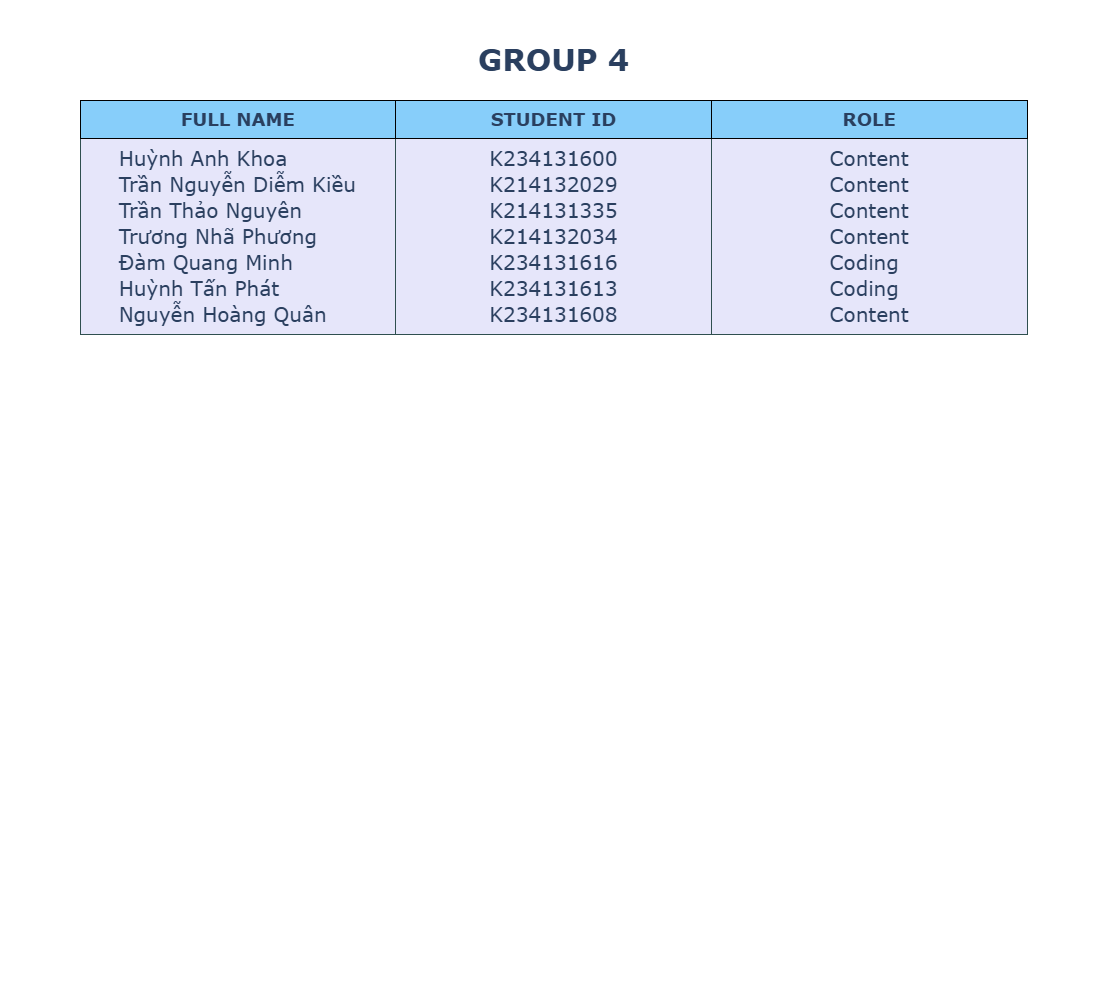

In [70]:

names = ['Huỳnh Anh Khoa', 'Trần Nguyễn Diễm Kiều', 'Trần Thảo Nguyên', 'Trương Nhã Phương', 'Đàm Quang Minh', 'Huỳnh Tấn Phát', 'Nguyễn Hoàng Quân']
ids = ['K234131600', 'K214132029', 'K214131335', 'K214132034', 'K234131616', 'K234131613', 'K234131608']
roles = ['Content', 'Content', 'Content', 'Content', 'Coding', 'Coding', 'Content']
merged_name = '<br>'.join(names)
merged_id = '<br>'.join(ids)
merged_role = '<br>'.join(roles)

new_names = [merged_name]
new_ids = [merged_id]
new_roles = [merged_role]

# Increase font size and height for a larger table, and center-align all text
fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>FULL NAME</b>', '<b>STUDENT ID</b>', '<b>ROLE</b>'],
                line_color='black',
                fill_color='lightskyblue',
                align='center',  
                font=dict(size=18)),
    cells=dict(values=[new_names, new_ids, new_roles],
               line_color='darkslategrey',
               fill_color='lavender',
               align='center',  #
               font=dict(size=20),
               height=35))
])

fig.update_layout(
    width=1000, 
    height=1000,  
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title=dict(
        text='<b>GROUP 4</b>',
        x=0.5,
        y=0.95,
        font=dict(
            size=30  
    )
))

fig.show()


In [9]:
df = pd.read_csv("C:/Local Code/Project/DataScience_salaries_2024.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


<h3 style="text-align: left; font-family: 'Jetbrains Mono'; color: red;"><b>1. INTRODUCTION</b></h3>


<h3 style="text-align: left; font-family: 'Jetbrains Mono'; color: red;"><b>2. OVERVIEW</b></h3>


<h3 style="text-align: left; font-family: 'Jetbrains Mono'; color: red;"><b>3. VISUALIZATION</b></h3>


In [ ]:
df_vietnam = df

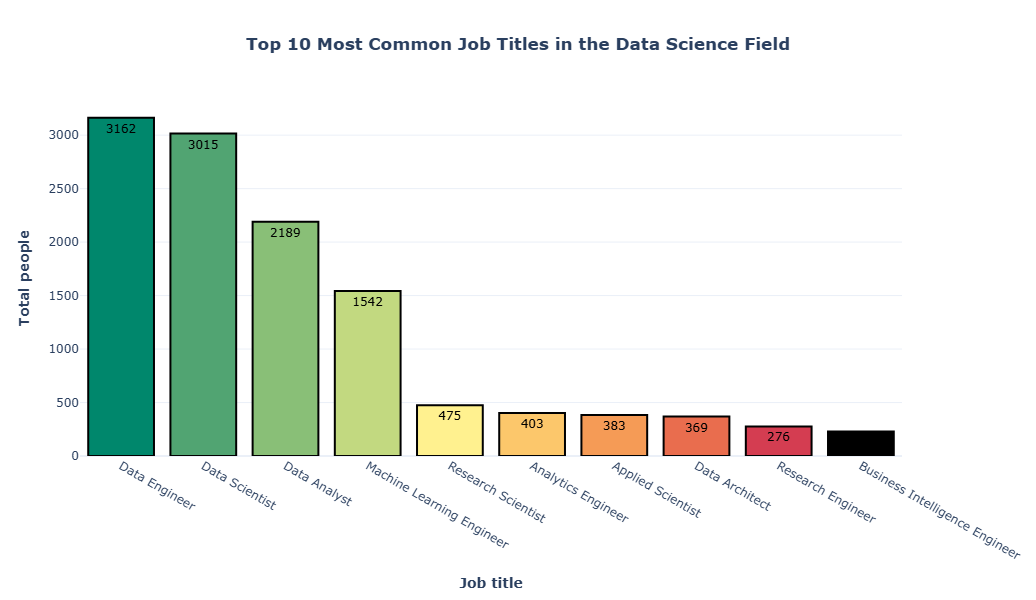

In [18]:
df_chart = df['job_title'].value_counts()[:10]
#select color - optional
colors = [
    "#00876c",
    "#51a472",
    "#89bf77",
    "#c2d980",
    "#fff18f",
    "#fcc76b",
    "#f59b56",
    "#e96d4e",
    "#d43d51"
]

#plot barchart
data = go.Bar(
    x=df_chart.index,
    y=df_chart.values,
    text=df_chart.values,
    textposition="inside",
    textfont=dict(size=12, color="black"),
    marker=dict(color=colors, line_color="black", line_width=2),
)
 
layout = go.Layout(
    title={
        "text": "<b>Top 10 Most Common Job Titles in the Data Science Field</b>",
        "x": 0.5,
        "xanchor": "center",
    },
    xaxis=dict(title="<b>Job title</b>"),
    yaxis=dict(title="<b>Total people</b>"),
    width=900,
    height=600,
    template="plotly_white",
)

fig = go.Figure(data=data, layout=layout)
 
fig.show()

<h5 style="text-align: left; font-family: 'Jetbrains Mono'; color: black;"><b>3.1. BAR CHART: DIFFERENCES QUANTITY PRODUCT CATEGORIES</b></h5>


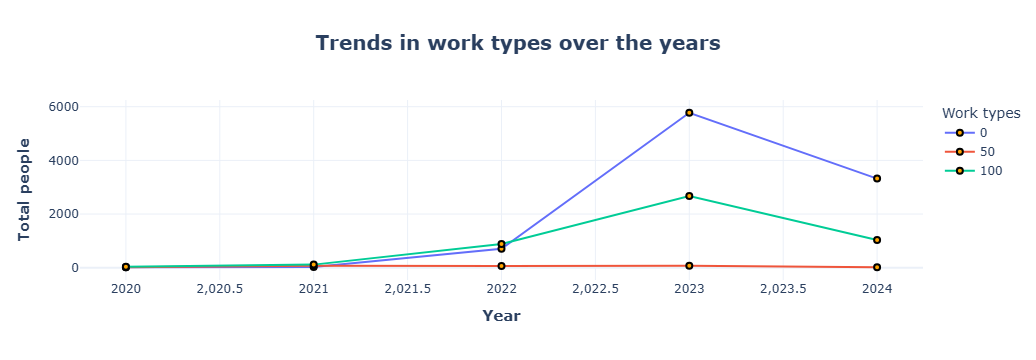

In [25]:
df_chart = df.groupby(['work_year', 'remote_ratio']).size().reset_index(name='number')
# Create a line plot using Plotly
fig = px.line(
    df_chart.reset_index(),  # Ensure 'work_year' and 'remote_ratio' are columns, not indices
    x='work_year',
    y='number',
    color='remote_ratio',
    markers=True,
    title='<b>Trends in work types over the years</b>',
)

# Update layout for better formatting
fig.update_layout(
    xaxis_title="<b>Year</b>",
    title_x=0.5,
    yaxis_title="<b>Total people</b>",
    legend_title='Work types',
    template="plotly_white",
    title_font_size=20,
    xaxis_title_font_size=15,
    yaxis_title_font_size=15
)

# Customize marker style
fig.update_traces(marker=dict(size=6, color='orange', line=dict(width=2, color='black')))

# Show the plot
fig.show()

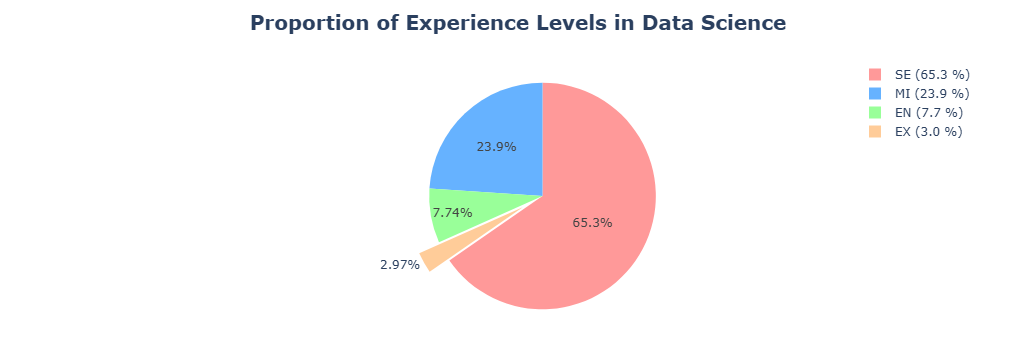

In [29]:
df_chart = df['experience_level'].value_counts(normalize=True) * 100
labels = [f'{c[0]} ({c[1].round(1)} %)' for c in zip(df_chart.index, df_chart.values)]
# Define the custom color palette
custom_palette = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF4500']

# Create a pie chart
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=df_chart.values,
    pull=[0] * (len(labels) - 1) + [0.2],  # Pull out the last slice
    marker=dict(colors=custom_palette),  # Custom colors
)])

# Update layout
fig.update_layout(
    title_text='<b>Proportion of Experience Levels in Data Science</b>',
    title_x=0.5,
    title_font_size=20,
    template="plotly_white",
    showlegend=True,
    margin=dict(t=60, b=0, l=0, r=0)  # Adjust margins if necessary
)

# Show the plot
fig.show()


<h5 style="text-align: left; font-family: 'Jetbrains Mono'; color: black;"><b>3.1. HISTOGRAM: NET AMOUNTS AND GROSS AMOUNT</b></h5>


In [ ]:
df_vietnam = df[df[""]]

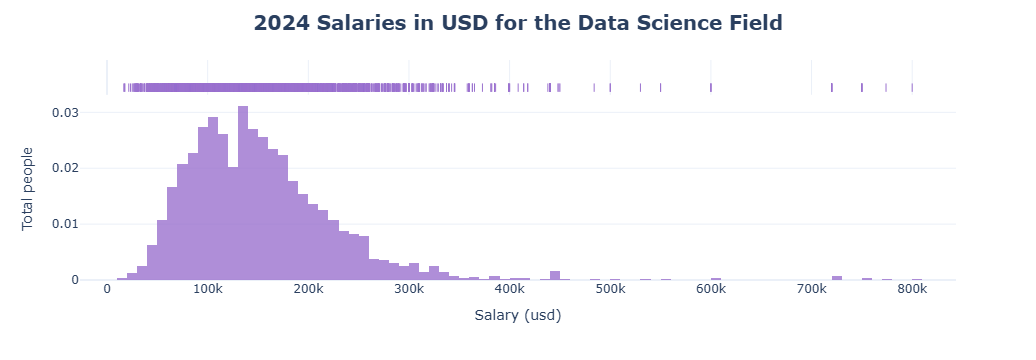

In [35]:
df_chart = df[df["work_year"] == 2024]
fig = px.histogram(df_chart, x='salary_in_usd', histnorm='density', nbins=100, marginal='rug', opacity=0.8, color_discrete_sequence = ["#9b72cf"])

# Customize the layout
fig.update_layout(
    title_text='<b>2024 Salaries in USD for the Data Science Field</b>',
    title_font_size=20,
    title_x=0.5,           
    xaxis_title='Salary (usd)',    
    yaxis_title='Total people',
    template="plotly_white",
    showlegend=True
)

fig.show()

<h5 style="text-align: left; font-family: 'Jetbrains Mono'; color: black;"><b>3.2. PIE & LINE CHART: PURCHASE METHOD</b></h5>


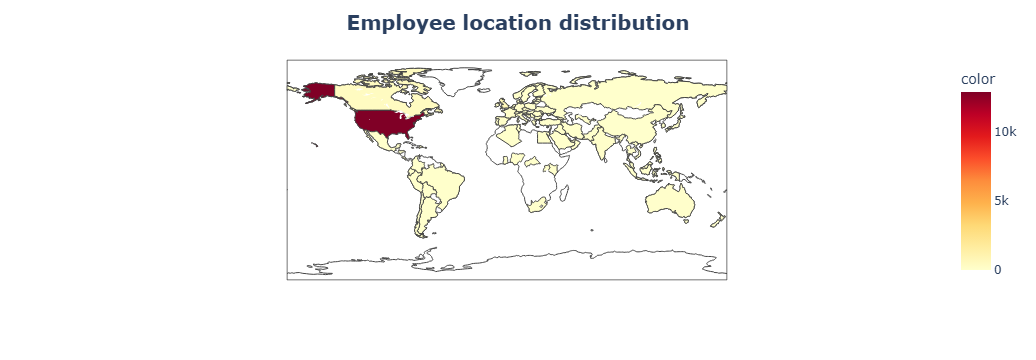

In [58]:
converted_country = coco.convert(names=df['employee_residence'], to="ISO3")
df['employee_residence'] = converted_country
df_chart = df['employee_residence'].value_counts()
fig = px.choropleth(
    locations=df_chart.index,
    color=df_chart.values,
    color_continuous_scale=px.colors.sequential.YlOrRd,  # Different color scale
    range_color=(0, df_chart.max()),  # Adjust color range
    template='seaborn',
)

fig.update_layout(
    title_text='<b>Employee location distribution</b>',
    title_font_size=20,
    title_x=0.5,
    template="plotly_white",
    showlegend=True
)
fig.show()       

In [33]:
# Import packages
from dash import Dash, html, dash_table, dcc
import pandas as pd
import plotly.express as px

# Incorporate data
df = pd.read_csv("C:/Users/phath/Downloads/archive (5)/project1_df.csv")

# Initialize the app
app = Dash()

# App layout
app.layout = [
    html.Div(children='WALL MART PLATFORM VISUALIZATION', style = {"color":"blue"}),
    dash_table.DataTable(data=df.to_dict('records'), page_size=10),
    dcc.Graph(figure=px.histogram(df, x='Gender', y='Net Amount', histfunc='avg'))
]

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


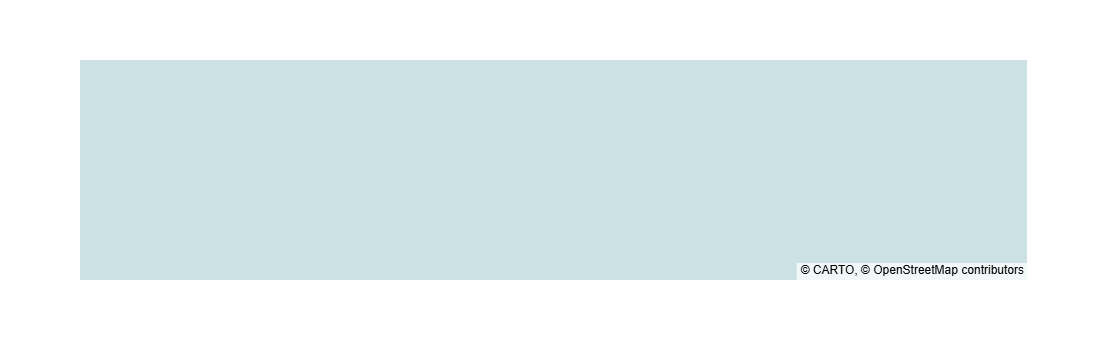

In [62]:
px.choropleth_map()

<h3 style="text-align: left; font-family: 'Jetbrains Mono'; color: red;"><b>RECOMMENDATION: </b></h3>

<h3 style="text-align: left; font-family: 'Jetbrains Mono'; color: red;"><b>CONCLUSION: </b></h3>

<h3 style="text-align: left; font-family: 'Jetbrains Mono'; color: red;"><b>REFERENCE: </b></h3>

